In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
data = pd.read_csv('Data.csv')

In [4]:
# Preprocess data: Remove potential outliers
filtered_data = data[data['Math'] >= 10]

In [5]:
# Define predictors and target
X_filtered = filtered_data[['Pysics', 'Science', 'Statistics']]
y_filtered = filtered_data['Math']

In [6]:
# Initialize a Gradient Boosting model
gb_model_base = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))


In [7]:
# Simplified parameter grid
simple_param_grid = {
    'gradientboostingregressor__n_estimators': [50, 100],
    'gradientboostingregressor__learning_rate': [0.01, 0.1],
    'gradientboostingregressor__max_depth': [3, 5],
    'gradientboostingregressor__min_samples_split': [2, 4],
    'gradientboostingregressor__min_samples_leaf': [1, 3]
}


In [8]:
# Initialize Grid Search with simplified grid
simple_grid_search = GridSearchCV(gb_model_base, simple_param_grid, 
                                  cv=5, scoring='r2', n_jobs=-1)

In [9]:
# Fit model
simple_grid_search.fit(X_filtered, y_filtered)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.01,
                                                                      0.1],
                         'gradientboostingregressor__max_depth': [3, 5],
                         'gradientboostingregressor__min_samples_leaf': [1, 3],
                         'gradientboostingregressor__min_samples_split': [2, 4],
                         'gradientboostingregressor__n_estimators': [50, 100]},
             scoring='r2')

In [10]:
# Generate predictions using the best model
best_gb_predictions = simple_grid_search.predict(X_filtered)

In [11]:
# Create a DataFrame to compare actual vs. predicted values
comparison_gb_best = pd.DataFrame({'Actual': y_filtered, 'Predicted': best_gb_predictions})


In [16]:
comparison_gb_best['Residuals'] = comparison_gb_best['Actual'] - comparison_gb_best['Predicted']


In [17]:
# Export the predictions to a CSV file
comparison_gb_best.to_csv('predicted_math_scores.csv', index=False)


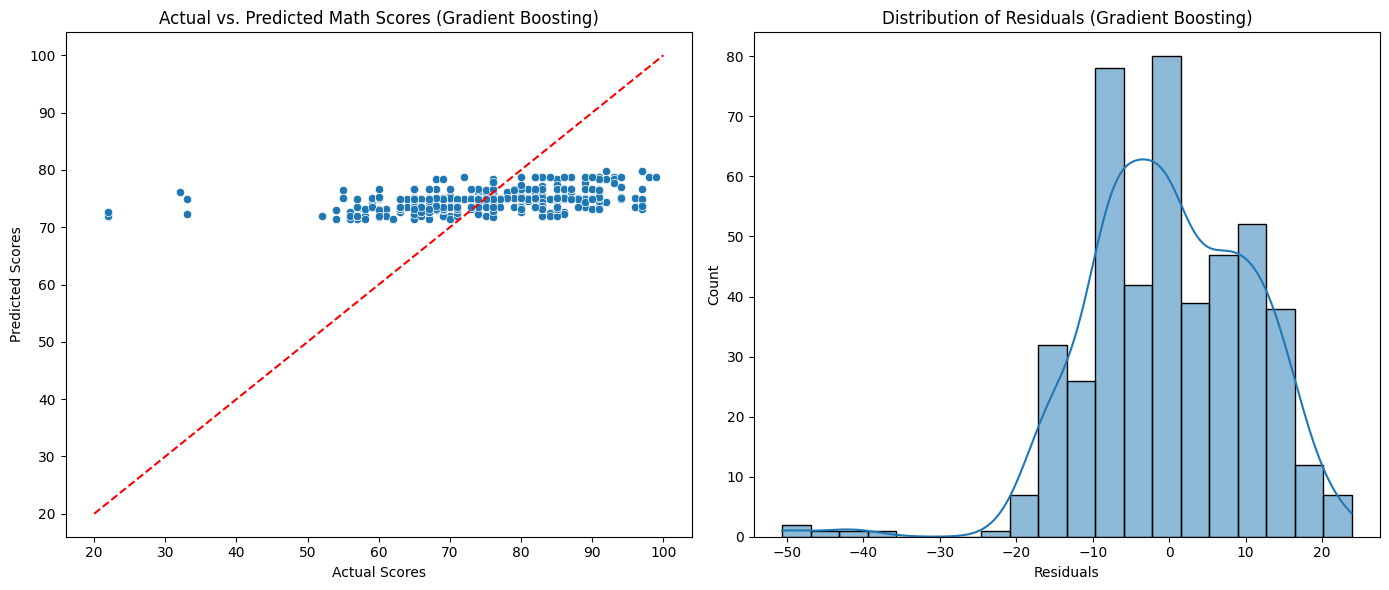

In [18]:
# Visualizing actual vs. predicted scores and residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=comparison_gb_best)
plt.plot([20, 100], [20, 100], color='red', linestyle='--')
plt.title('Actual vs. Predicted Math Scores (Gradient Boosting)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

plt.subplot(1, 2, 2)
sns.histplot(comparison_gb_best['Residuals'], bins=20, kde=True)
plt.title('Distribution of Residuals (Gradient Boosting)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()